In [2]:
#Importamos las librerias de panda y numpy, y leemos el archivo de train.csv en un DataFrame llamado train.
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")

#Filas y columnas
print ("shape of loaded dataframe", train.shape)

#Encabezados
train.head()

shape of loaded dataframe (692500, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [3]:
# Cuenta valores faltantes (NaN) por columna
train.isna().sum()

ID                                 0
PERIODO_ACADEMICO                  0
E_PRGM_ACADEMICO                   0
E_PRGM_DEPARTAMENTO                0
E_VALORMATRICULAUNIVERSIDAD     6287
E_HORASSEMANATRABAJA           30857
F_ESTRATOVIVIENDA              32137
F_TIENEINTERNET                26629
F_EDUCACIONPADRE               23178
F_TIENELAVADORA                39773
F_TIENEAUTOMOVIL               43623
E_PRIVADO_LIBERTAD                 0
E_PAGOMATRICULAPROPIO           6498
F_TIENECOMPUTADOR              38103
F_TIENEINTERNET.1              26629
F_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                 0
INDICADOR_1                        0
INDICADOR_2                        0
INDICADOR_3                        0
INDICADOR_4                        0
dtype: int64

In [4]:
# Muestra los tipos de datos de cada columna
train.dtypes

ID                               int64
PERIODO_ACADEMICO                int64
E_PRGM_ACADEMICO                object
E_PRGM_DEPARTAMENTO             object
E_VALORMATRICULAUNIVERSIDAD     object
E_HORASSEMANATRABAJA            object
F_ESTRATOVIVIENDA               object
F_TIENEINTERNET                 object
F_EDUCACIONPADRE                object
F_TIENELAVADORA                 object
F_TIENEAUTOMOVIL                object
E_PRIVADO_LIBERTAD              object
E_PAGOMATRICULAPROPIO           object
F_TIENECOMPUTADOR               object
F_TIENEINTERNET.1               object
F_EDUCACIONMADRE                object
RENDIMIENTO_GLOBAL              object
INDICADOR_1                    float64
INDICADOR_2                    float64
INDICADOR_3                    float64
INDICADOR_4                    float64
dtype: object

#Estudio de las columnas
## Comenzamos con el periodo

Separamos el año del periodo en dos columnas y lo trabajamos como numeros o como etiquetas.

Al tratar los períodos como etiquetas (usando One-Hot Encoding), el modelo no podrá predecir resultados para períodos diferentes a los presentes en los datos de entrenamiento. Si bien esto podría mejorar la precisión del modelo en el conjunto de datos de prueba (al ajustarse mejor a los patrones específicos de esos períodos), existe el riesgo de sobreajuste, lo que significa que el modelo podría no generalizar bien a datos nuevos y no vistos.

In [5]:
# Obtiene y ordena los valores únicos de la columna PERIODO_ACADEMICO
#Lista ordenada de los valores del período únicos presentes en el conjunto de datos
sorted(train.PERIODO_ACADEMICO.unique())

[np.int64(20183),
 np.int64(20184),
 np.int64(20194),
 np.int64(20195),
 np.int64(20196),
 np.int64(20202),
 np.int64(20203),
 np.int64(20212),
 np.int64(20213)]

### Columna onehot

In [6]:
# Aplica One-Hot Encoding a la columna PERIODO_ACADEMICO
df_onehot = pd.get_dummies(train['PERIODO_ACADEMICO'], prefix='PER')
train = pd.concat([train, df_onehot], axis=1)

In [7]:
# Elimina la columna PERIODO_ACADEMICO original
train = train.drop(columns=['PERIODO_ACADEMICO'])

In [8]:
# Muestra las primeras filas del DataFrame actualizado
train.head()

,ID,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,...,INDICADOR_4,PER_20183,PER_20184,PER_20194,PER_20195,PER_20196,PER_20202,PER_20203,PER_20212,PER_20213
0,904256,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,...,0.267,False,False,False,False,False,False,False,True,False
1,645256,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,...,0.264,False,False,False,False,False,False,False,True,False
2,308367,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,...,0.264,False,False,False,False,False,False,True,False,False
3,470353,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,...,0.190,False,False,False,True,False,False,False,False,False
4,989032,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,...,0.294,False,False,False,False,False,False,False,True,False


## Programa Academico

Dado el gran número de programas académicos, una estrategia viable es agruparlos en categorías más amplias como Ingeniería, Licenciatura o Ciencias Exactas, en lugar de aplicar One-Hot Encoding a cada carrera individual.

Considerar las áreas de conocimiento evaluadas en el examen (matemáticas, lectura crítica, sociales y ciudadanas, ciencias naturales e inglés) podría ser útil para mejorar la capacidad predictiva del modelo.

Identificar y agrupar programas académicos con nombres similares (distancia de edición corta) podría ayudar a detectar posibles duplicados o variaciones de la misma carrera.

Estos puntos son buenas consideraciones para abordar la alta cardinalidad de la columna de programas académicos y explorar posibles relaciones con el rendimiento global.


In [9]:
# Cuenta el número de valores únicos en la columna E_PRGM_ACADEMICO
len(sorted(train.E_PRGM_ACADEMICO.unique()))

948

### Modificación de columna: Reducción de etiqueta, mapeo y variable nominal

In [10]:
# Cuenta el número de valores únicos en la columna E_PRGM_ACADEMICO
len(train.E_PRGM_ACADEMICO.unique())

948

In [11]:
# Define una función para categorizar programas académicos
import pandas as pd
import numpy as np
import re

# Función para categorizar programas académicos basada en palabras clave
def categorize_program(program):
    program = program.lower()  # Convertir a minúsculas para facilitar la coincidencia

    # Definir mapeos basados en palabras clave comunes
    if re.search(r'admin|ges|neg|fin|conta', program):
        return 'Administracion_y_Negocios'

    elif re.search(r'(inge(nier.a)?)', program):
        return 'Ingenieria'

    elif re.search(r'lice|edu|pedago', program):
        return 'Licenciatura'

    elif re.search(r'(med.+?c(.+?)?[ao](\b|^))|(salud)|(farma)|(psic)|(terapia)|(veteri)|(enfer)', program):
        return 'Medicina'

    elif re.search(r'\bderecho|juridic', program):
        return 'Derecho'

    elif re.search(r'merc|publici|tecnia', program):
        return 'Mercadeo_y_Publicidad'

    elif re.search(r'comput', program):
        return 'Computacion'

    elif re.search(r'dise|art(e|.sti)|m[uú]s|cine|telev|audiovis|fotog|danz|tea|core', program):
        return 'Artes'

    elif re.search(r'cienc((.+?\bnat)|.+?^)|geo|bio|qu.m|f.sic|amb', program) and not re.search(r'edu|deporte|recre', program):
        return 'Ciencias'

    elif re.search(r'cienc.+?soci|sociolo|human|antropolog|histor|filos|', program):
        return 'Ciencias_Sociales_y_Humanidades'

    elif re.search(r'filol|letr', program):
        return 'Letras'

    elif re.search(r'idio|leng|extr|espa..?ol|ingl|fran', program):
        return 'Lenguas'

    else:
        return 'Otros'

In [12]:
# Cuenta el número de valores únicos en la columna E_PRGM_ACADEMICO
len(train.E_PRGM_ACADEMICO.unique())

948

In [13]:
# Obtiene y ordena los valores únicos de la columna E_PRGM_ACADEMICO
sorted(train.E_PRGM_ACADEMICO.unique())

['3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES',
 'ACTIVIDAD FISICA Y DEPORTE',
 'ACUICULTURA',
 'ADMINISTRACION',
 'ADMINISTRACION  FINANCIERA',
 'ADMINISTRACION & SERVICIO',
 'ADMINISTRACION AERONAUTICA',
 'ADMINISTRACION AGROPECUARIA',
 'ADMINISTRACION AMBIENTAL',
 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES',
 'ADMINISTRACION BANCARIA Y FINANCIERA',
 'ADMINISTRACION COMERCIAL',
 'ADMINISTRACION COMERCIAL Y DE MERCADEO',
 'ADMINISTRACION DE COMERCIO EXTERIOR',
 'ADMINISTRACION DE EMPRESAS',
 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL',
 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES',
 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS',
 'ADMINISTRACION DE EMPRESAS COMERCIALES',
 'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES',
 'ADMINISTRACION DE EMPRESAS TURISTICA',
 'ADMINISTRACION DE EMPRESAS TURISTICAS',
 'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS',
 'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS',
 'ADMINISTRACION DE EMPRESAS Y FINANZAS',
 'ADMINISTRACI

In [14]:
# Muestra la columna E_PRGM_ACADEMICO
train.E_PRGM_ACADEMICO

0                                  ENFERMERIA
1                                     DERECHO
2                       MERCADEO Y PUBLICIDAD
3                  ADMINISTRACION DE EMPRESAS
4                                  PSICOLOGIA
                         ...                 
692495                               BIOLOGIA
692496                             PSICOLOGIA
692497    ADMINISTRACIÓN EN SALUD OCUPACIONAL
692498                             PSICOLOGIA
692499                             PSICOLOGIA
Name: E_PRGM_ACADEMICO, Length: 692500, dtype: object

In [15]:
# Aplica la función de categorización y cuenta los valores
train['Categoria'] = train['E_PRGM_ACADEMICO'].apply(categorize_program)
train['Categoria'].value_counts()

Categoria
Administracion_y_Negocios          201457
Ingenieria                         146551
Medicina                            98394
Ciencias_Sociales_y_Humanidades     87176
Licenciatura                        66661
Derecho                             53696
Artes                               17770
Mercadeo_y_Publicidad               12344
Ciencias                             8307
Computacion                           144
Name: count, dtype: int64

In [16]:
# Elimina la columna E_PRGM_ACADEMICO y muestra las primeras filas
del train["E_PRGM_ACADEMICO"]
train.head()

,ID,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,PER_20183,PER_20184,PER_20194,PER_20195,PER_20196,PER_20202,PER_20203,PER_20212,PER_20213,Categoria
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,...,False,False,False,False,False,False,False,True,False,Medicina
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,...,False,False,False,False,False,False,False,True,False,Derecho
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,...,False,False,False,False,False,False,True,False,False,Mercadeo_y_Publicidad
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,...,False,False,False,True,False,False,False,False,False,Administracion_y_Negocios
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,...,False,False,False,False,False,False,False,True,False,Medicina


#### OneHot

In [17]:
# Aplica One-Hot Encoding a la columna Categoria y elimina la original
df_onehot = pd.get_dummies(train['Categoria'])
train = pd.concat([train, df_onehot], axis=1)
del train["Categoria"]
train.head()

,ID,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,Administracion_y_Negocios,Artes,Ciencias,Ciencias_Sociales_y_Humanidades,Computacion,Derecho,Ingenieria,Licenciatura,Medicina,Mercadeo_y_Publicidad
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,...,False,False,False,False,False,False,False,False,True,False
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,...,False,False,False,False,False,True,False,False,False,False
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,...,False,False,False,False,False,False,False,False,False,True
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,...,True,False,False,False,False,False,False,False,False,False
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,...,False,False,False,False,False,False,False,False,True,False


In [18]:
# Muestra las primeras filas del DataFrame actualizado
train.head()

,ID,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,Administracion_y_Negocios,Artes,Ciencias,Ciencias_Sociales_y_Humanidades,Computacion,Derecho,Ingenieria,Licenciatura,Medicina,Mercadeo_y_Publicidad
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,...,False,False,False,False,False,False,False,False,True,False
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,...,False,False,False,False,False,True,False,False,False,False
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,...,False,False,False,False,False,False,False,False,False,True
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,...,True,False,False,False,False,False,False,False,False,False
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,...,False,False,False,False,False,False,False,False,True,False


## Departamento

In [19]:
# Cuenta el número de valores únicos en la columna E_PRGM_DEPARTAMENTO
len(train.E_PRGM_DEPARTAMENTO.unique())

31

In [20]:
# Obtiene y ordena los valores únicos de la columna E_PRGM_DEPARTAMENTO
len(sorted(train.E_PRGM_DEPARTAMENTO.unique()))

31

### Modificaciones columna: Variable nominal

In [21]:
# Reemplaza espacios en nombres de departamentos y muestra valores únicos ordenados
#Se eliminan los espacios para poder acceder a la variables asi: train.EL_DEPARTAMENTO
train['E_PRGM_DEPARTAMENTO'] = train['E_PRGM_DEPARTAMENTO'].str.replace(' ', '_')
sorted(train.E_PRGM_DEPARTAMENTO.unique())

['AMAZONAS',
 'ANTIOQUIA',
 'ARAUCA',
 'ATLANTICO',
 'BOGOTÁ',
 'BOLIVAR',
 'BOYACA',
 'CALDAS',
 'CAQUETA',
 'CASANARE',
 'CAUCA',
 'CESAR',
 'CHOCO',
 'CORDOBA',
 'CUNDINAMARCA',
 'GUAVIARE',
 'HUILA',
 'LA_GUAJIRA',
 'MAGDALENA',
 'META',
 'NARIÑO',
 'NORTE_SANTANDER',
 'PUTUMAYO',
 'QUINDIO',
 'RISARALDA',
 'SANTANDER',
 'SAN_ANDRES',
 'SUCRE',
 'TOLIMA',
 'VALLE',
 'VAUPES']

#### OneHot

In [22]:
# Aplica One-Hot Encoding a la columna E_PRGM_DEPARTAMENTO
df_onehot = pd.get_dummies(train['E_PRGM_DEPARTAMENTO'], prefix='DEP')
train = pd.concat([train, df_onehot], axis=1)

In [23]:
# Muestra las primeras filas del DataFrame actualizado
train.head()

,ID,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,...,False,False,False,False,False,False,False,False,False,False
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,...,False,False,False,False,False,False,False,False,False,False
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,...,False,False,False,False,False,False,False,False,False,False
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,...,False,False,False,False,True,False,False,False,False,False
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# Elimina la columna E_PRGM_DEPARTAMENTO original
train.drop(columns=['E_PRGM_DEPARTAMENTO'], inplace=True)

In [25]:
# Muestra las primeras filas del DataFrame actualizado
train.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


# Decisiones de las columnas con NAN

## Con el precio de la matricula

Posibildades de preprocesamiento:


*   Agrupar en clases y trabajarlo como variables ordinales. Ejemplo : No pago matricula: 0, Menos de 500 mil: 1, ...
*   Promedio de los valores.
*  Agarrar el inferior o el  superior.
*  Trabajarlo como etiquetas (OneHot)


Posibiliades para la valores nulos:

*   Media
*   Moda
*   Mediana
*   Descartarlos
*   Por un valor particular
*   Cosiderar que no pagaron nada

In [26]:
# Muestra los valores únicos de la columna E_VALORMATRICULAUNIVERSIDAD
train.E_VALORMATRICULAUNIVERSIDAD.unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

In [27]:
# Calcula el número y porcentaje de valores faltantes en la columna E_VALORMATRICULAUNIVERSIDAD
(train.shape[0], train.E_VALORMATRICULAUNIVERSIDAD.isna().sum(), train.E_VALORMATRICULAUNIVERSIDAD.isna().sum()/train.shape[0])

(692500, np.int64(6287), np.float64(0.009078700361010831))

### Modificación de la columna: Variable ordinal

In [28]:
# Muestra la columna E_VALORMATRICULAUNIVERSIDAD
train.E_VALORMATRICULAUNIVERSIDAD

0         Entre 5.5 millones y menos de 7 millones
1         Entre 2.5 millones y menos de 4 millones
2         Entre 2.5 millones y menos de 4 millones
3         Entre 4 millones y menos de 5.5 millones
4         Entre 2.5 millones y menos de 4 millones
                            ...                   
692495           Entre 500 mil y menos de 1 millón
692496    Entre 2.5 millones y menos de 4 millones
692497      Entre 1 millón y menos de 2.5 millones
692498    Entre 2.5 millones y menos de 4 millones
692499    Entre 5.5 millones y menos de 7 millones
Name: E_VALORMATRICULAUNIVERSIDAD, Length: 692500, dtype: object

In [29]:
# Mapea los valores de la columna E_VALORMATRICULAUNIVERSIDAD a números y muestra conteos
cmap = {'No pagó matrícula': 0,
        'Menos de 500 mil': 1,
        'Entre 500 mil y menos de 1 millón': 2,
        'Entre 1 millón y menos de 2.5 millones': 3,
        'Entre 2.5 millones y menos de 4 millones': 4,
        'Entre 4 millones y menos de 5.5 millones': 5,
        'Entre 5.5 millones y menos de 7 millones': 6,
        'Más de 7 millones': 7}

train['E_VALORMATRICULAUNIVERSIDAD'] = train['E_VALORMATRICULAUNIVERSIDAD'].replace(cmap)

train.E_VALORMATRICULAUNIVERSIDAD.value_counts()
train.head()

C:\Users\jjcor\AppData\Local\Temp\ipykernel_19516\4159731854.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['E_VALORMATRICULAUNIVERSIDAD'] = train['E_VALORMATRICULAUNIVERSIDAD'].replace(cmap)


,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0,Estrato 4,Si,No sabe,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


### Modificación de los NaN: Mediana

In [30]:
# Rellena los valores faltantes en E_VALORMATRICULAUNIVERSIDAD con la mediana
# Calcular la mediana de la columna 'E_VALORMATRICULAUNIVERSIDAD'
mediana = train['E_VALORMATRICULAUNIVERSIDAD'].median()

# Reemplazar los valores NaN con la mediana
train['E_VALORMATRICULAUNIVERSIDAD'].fillna(mediana, inplace=True)

# Verificar la mediana aplicada
print("Mediana utilizada para reemplazo:", mediana)

Mediana utilizada para reemplazo: 3.0


C:\Users\jjcor\AppData\Local\Temp\ipykernel_19516\2072974074.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['E_VALORMATRICULAUNIVERSIDAD'].fillna(mediana, inplace=True)


In [31]:
# Verifica el número y porcentaje de valores faltantes después del reemplazo
(train.shape[0], train.E_VALORMATRICULAUNIVERSIDAD.isna().sum(), train.E_VALORMATRICULAUNIVERSIDAD.isna().sum()/train.shape[0])

(692500, np.int64(0), np.float64(0.0))

## Con las horas semanales trabajadas por los estudiantes




Para la columna:

* Valores cualitavos(Etiquetas) nominales
* Valores cualitavos ordinales
  *   Introducir la parte superior
  *   Introducir la parte inferior
  *   "0":0, 'Menos de 10 horas':1, ...
* Valores cuantitavos
  *   Promedio aritmetico o geometrico

Con los NA:

* Cualitativa:
  *   Eliminar
  *   **Moda**
  *   Convertir en 0
  *   Convertir en -1
  *   Hacer imputacion con inferencia de otras columnas

* Cuantitativa:
  *   Media
  *   Mediana



In [32]:
# Muestra los valores únicos de la columna E_HORASSEMANATRABAJA
train.E_HORASSEMANATRABAJA.unique()

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

In [33]:
# Calcula el porcentaje de valores faltantes en la columna E_HORASSEMANATRABAJA
train.E_HORASSEMANATRABAJA.isna().sum()/train.shape[0]

np.float64(0.04455884476534296)

### Modificación de la columna: Variable ordinal

In [34]:
# Mapea los valores de la columna E_HORASSEMANATRABAJA a números ordinales y muestra conteos
# Defino el orden para los valores ordinales
horas_trabajo_mapping = {
        '0': 0,
        'Menos de 10 horas': 1,
        'Entre 11 y 20 horas': 2,
        'Entre 21 y 30 horas': 3,
        'Más de 30 horas': 4
    }

# Convierto la columna en tipo categórico ordinal
train['E_HORASSEMANATRABAJA'] = train['E_HORASSEMANATRABAJA'].replace(horas_trabajo_mapping)
train.E_HORASSEMANATRABAJA.value_counts()

# Verifico los cambios
print(train['E_HORASSEMANATRABAJA'].value_counts())
train.E_HORASSEMANATRABAJA.unique()

E_HORASSEMANATRABAJA
4.0    249352
0.0    116550
2.0    115857
3.0     92693
1.0     87191
Name: count, dtype: int64


C:\Users\jjcor\AppData\Local\Temp\ipykernel_19516\1964569943.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['E_HORASSEMANATRABAJA'] = train['E_HORASSEMANATRABAJA'].replace(horas_trabajo_mapping)


array([ 1.,  0.,  4.,  3.,  2., nan])

### Modificación de los NaN: Moda

In [35]:
# Rellena los valores faltantes en E_HORASSEMANATRABAJA con la moda
# Reemplazo los valores NaN con la moda
moda = train['E_HORASSEMANATRABAJA'].mode()[0]
train['E_HORASSEMANATRABAJA'].fillna(moda, inplace=True)
print(moda)

4.0


C:\Users\jjcor\AppData\Local\Temp\ipykernel_19516\1361222577.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['E_HORASSEMANATRABAJA'].fillna(moda, inplace=True)


In [36]:
# Muestra las primeras filas de la columna E_HORASSEMANATRABAJA después del reemplazo
train.E_HORASSEMANATRABAJA.head()

0    1.0
1    0.0
2    4.0
3    0.0
4    3.0
Name: E_HORASSEMANATRABAJA, dtype: float64

## Con el estrato de vivienda

Para la columna:

* Valores cualitavos(Etiquetas) nominales
* Valores cualitavos ordinales
  *   "Sin Estrato":0, "Estrato 1":1, 'Estrato 2':2, ...
  *   "Sin Estrato":1, "Estrato 1":2, 'Estrato 2':3, ...

Los NA:

*   Eliminarlos
*   Convertirlos sin estrato.
*   ¿Los sin estrato son otro na?
*   Hacer imputacion con inferencia de otras columnas

In [37]:
# Muestra los valores únicos de la columna F_ESTRATOVIVIENDA
train.F_ESTRATOVIVIENDA.unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       nan, 'Estrato 6', 'Sin Estrato'], dtype=object)

In [38]:
# Calcula el número y porcentaje de valores faltantes en la columna F_ESTRATOVIVIENDA
train.F_ESTRATOVIVIENDA.isna().sum(),train.F_ESTRATOVIVIENDA.isna().sum()/train.shape[0]

(np.int64(32137), np.float64(0.046407220216606496))

In [39]:
# Cuenta las filas donde F_ESTRATOVIVIENDA es "Sin Estrato"
train[train.F_ESTRATOVIVIENDA == "Sin Estrato"].shape

(3289, 68)

In [40]:
# Calcula el total de valores faltantes y "Sin Estrato" y su porcentaje
train.F_ESTRATOVIVIENDA.isna().sum()+train[train.F_ESTRATOVIVIENDA == "Sin Estrato"].shape[0], (train.F_ESTRATOVIVIENDA.isna().sum()+train[train.F_ESTRATOVIVIENDA == "Sin Estrato"].shape[0])/train.shape[0]

(np.int64(35426), np.float64(0.05115667870036101))

### Modificación de la columna: Variable ordinal

In [41]:
# Mapea los valores de estrato a números ordinales
estrato_mapping = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

# Reemplazamos los valores categóricos por los numéricos
train['F_ESTRATOVIVIENDA'] = train['F_ESTRATOVIVIENDA'].replace(estrato_mapping)

### Modificación de los NaN: Distribución de probabilidad

In [42]:
# Rellena los valores faltantes y "Sin Estrato" en F_ESTRATOVIVIENDA usando distribución de probabilidad
# Paso 1: Reemplazar "Sin Estrato" con NaN
train['F_ESTRATOVIVIENDA'] = train['F_ESTRATOVIVIENDA'].replace('Sin Estrato', np.nan)

# Paso 2: Rellenar los NaN aleatoriamente usando una distribución de probabilidad
# Obtener los valores sin NaN
non_nan_values = train['F_ESTRATOVIVIENDA'].dropna()

# Probabilidades según la frecuencia de aparición
probabilities = non_nan_values.value_counts(normalize=True)

# Función para rellenar los NaN aleatoriamente
def fill_random(val):
    if pd.isna(val):
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicar la función para rellenar los NaN
train['F_ESTRATOVIVIENDA'] = train['F_ESTRATOVIVIENDA'].apply(fill_random)

C:\Users\jjcor\AppData\Local\Temp\ipykernel_19516\610448616.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['F_ESTRATOVIVIENDA'] = train['F_ESTRATOVIVIENDA'].replace('Sin Estrato', np.nan)


In [43]:
# Muestra las primeras filas del DataFrame actualizado
train.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,Si,Técnica o tecnológica incompleta,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,No,Técnica o tecnológica completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,Si,Secundaria (Bachillerato) completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,Si,No sabe,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,Si,Primaria completa,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


## Con el hecho de tener internet o no

Para la columna:

* Valores cualitavos(Etiquetas) nominales
* Valores cualitavos ordinales
  * "No":0, "Si":1

Los NA:

* Eliminarlos
* Ponerle un valor un aleatorio entre si y no.
* Moda
* Hacer imputacion con inferencia de otras columnas
  * Ejemplo: Si es estrato 3 para arriba "sí", sino "no".

In [44]:
# Muestra los valores únicos de la columna F_TIENEINTERNET
train.F_TIENEINTERNET.unique()

array(['Si', 'No', nan], dtype=object)

In [45]:
# Calcula el número y porcentaje de valores faltantes en la columna F_TIENEINTERNET
train.F_TIENEINTERNET.isna().sum(),train.F_TIENEINTERNET.isna().sum()/train.shape[0]

(np.int64(26629), np.float64(0.038453429602888084))

In [46]:
# Cuenta las ocurrencias de "Si" y "No" en la columna F_TIENEINTERNET
len(train.F_TIENEINTERNET[train.F_TIENEINTERNET == "Si"]), len(train.F_TIENEINTERNET[train.F_TIENEINTERNET == "No"])

(592514, 73357)

### Modificación de la columna: Variable ordinal

In [47]:
# Mapea los valores de la columna F_TIENEINTERNET a números ordinales y muestra conteos
# Defino el orden para los valores ordinales
tiene_internet_mapping = {
        'No': 0,
        'Si': 1
    }

# Convierto la columna en tipo categórico ordinal
train.F_TIENEINTERNET = train.F_TIENEINTERNET.replace(tiene_internet_mapping)
train.F_TIENEINTERNET.value_counts()

# Verifico los cambios
print(train['F_TIENEINTERNET'].value_counts())
train.F_TIENEINTERNET.unique()

F_TIENEINTERNET
1.0    592514
0.0     73357
Name: count, dtype: int64


C:\Users\jjcor\AppData\Local\Temp\ipykernel_19516\3525967691.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.F_TIENEINTERNET = train.F_TIENEINTERNET.replace(tiene_internet_mapping)


array([ 1.,  0., nan])

### Modificación de los NaN: Moda


In [48]:
# Rellena los valores faltantes en F_TIENEINTERNET con la moda
# Calcular la moda de la columna 'F_TIENEINTERNET'
moda = train['F_TIENEINTERNET'].mode()[0]

# Reemplazar los valores NaN con la moda
train['F_TIENEINTERNET'].fillna(moda, inplace=True)

# Verificar la moda aplicada
print("Moda utilizada para reemplazo:", moda)

Moda utilizada para reemplazo: 1.0


C:\Users\jjcor\AppData\Local\Temp\ipykernel_19516\3970101809.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['F_TIENEINTERNET'].fillna(moda, inplace=True)


In [49]:
# Muestra la columna F_TIENEINTERNET después del reemplazo
train.F_TIENEINTERNET

0         1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
692495    1.0
692496    1.0
692497    1.0
692498    0.0
692499    1.0
Name: F_TIENEINTERNET, Length: 692500, dtype: float64

## Educación padre



Para la columna:

* Redución de etiquetas y nueva enumeración
    * nan, No sabe y No Aplica juntos
    * Separar entre los que se graduaron del colegio y no
    * Todo lo completado en una  y lo otro en otra.
    * Primaria, segundria, Tecnologica o tecnica, pregrado, postgrado
    * Combinación con otras columnas.
    * (Otra)

* Valores cualitavos(Etiquetas) nominales
  * Separar entre los que se graduaron del colegio y no
* Valores cualitavos ordinales
  * 'Ninguno':0, ...
  

Nota: Se pueden combinar ambas

Los NA:

* Eliminarlos
* Ponerle un clase aleatoria entre las clases
* Moda
* Hacer imputacion con inferencia de otras columnas
* Agruparlos con "No sabe" o "No Aplica" o al reves.

Nota: Podria ser mas util juntar `No Aplica` con `Ninguno`? Pues, a diferencia de `No sabe` y `No aplica`, este indica el conocimiento del nivel de educacion de la madre pero se considero que no era suficiente para colocar alguna opcion, por lo que esta podria clasificar mejor en `Ninguno`.

Decisiones: Combinar "No sabe", "No aplica" y nan. Reducir a graduados y no graduados y tratar los nan con inferencia o aleatoriedad.


In [50]:
# Muestra los valores únicos de la columna F_EDUCACIONPADRE
train.F_EDUCACIONPADRE.unique()

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', nan, 'Secundaria (Bachillerato) incompleta',
       'Ninguno', 'No Aplica'], dtype=object)

In [51]:
# Calcula el número y porcentaje de valores faltantes en la columna F_EDUCACIONPADRE
train.F_EDUCACIONPADRE.isna().sum(),train.F_EDUCACIONPADRE.isna().sum()/train.shape[0]

(np.int64(23178), np.float64(0.03347003610108303))

In [52]:
# Calcula el total de valores faltantes, "No sabe" y "No Aplica" en F_EDUCACIONPADRE y su porcentaje
train.F_EDUCACIONPADRE.isna().sum()+train[train.F_EDUCACIONPADRE == "No sabe"].shape[0]+train[train.F_EDUCACIONPADRE == "No Aplica"].shape[0], (train.F_EDUCACIONPADRE.isna().sum()+train[train.F_EDUCACIONPADRE == "No Aplica"].shape[0]+train[train.F_EDUCACIONPADRE == "No sabe"].shape[0])/train.shape[0]

(np.int64(48999), np.float64(0.07075667870036101))

### Modificación de la columna: Variable ordinal

In [53]:
# Muestra las primeras filas del DataFrame
train.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,Técnica o tecnológica incompleta,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,Técnica o tecnológica completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,Secundaria (Bachillerato) completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,No sabe,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,Primaria completa,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


In [54]:
# Reemplaza "No sabe" y "No Aplica" con NaN y mapea a "Graduados" (1) o "No graduados" (0)
# Paso 1: Reemplazar "No sabe" y "No Aplica" con NaN
train['F_EDUCACIONPADRE'] = train['F_EDUCACIONPADRE'].replace(['No sabe', 'No Aplica'], np.nan)

# Paso 2: Reducir a "Graduados" (1) y "No graduados" (0)
# Crear un diccionario para el mapeo de las categorías
educacion_graduados_mapping = {
    'Ninguno': 0,
    'Primaria incompleta': 0,
    'Primaria completa': 0,
    'Secundaria (Bachillerato) incompleta': 0,
    'Secundaria (Bachillerato) completa': 1,
    'Técnica o tecnológica incompleta': 1,
    'Técnica o tecnológica completa': 1,
    'Educación profesional incompleta': 1,
    'Educación profesional completa': 1,
    'Postgrado': 1
}

# Aplicar el mapeo
train['F_EDUCACIONPADRE'] = train['F_EDUCACIONPADRE'].replace(educacion_graduados_mapping)

C:\Users\jjcor\AppData\Local\Temp\ipykernel_19516\671409181.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['F_EDUCACIONPADRE'] = train['F_EDUCACIONPADRE'].replace(educacion_graduados_mapping)


### Modificación de los NaN: Distribución de probabilidad

In [55]:
# Rellena los valores faltantes en F_EDUCACIONPADRE usando distribución de probabilidad
# Paso 3: Rellenar los NaN de forma aleatoria basada en la distribución de "Graduados" (1) y "No graduados" (0)
# Obtener los valores sin NaN
non_nan_values = train['F_EDUCACIONPADRE'].dropna()

# Calcular las probabilidades de "Graduados" y "No graduados"
probabilities = non_nan_values.value_counts(normalize=True)

# Función para rellenar los NaN aleatoriamente
def fill_nan_random(val):
    if pd.isna(val):
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicar la función para rellenar los NaN
train['F_EDUCACIONPADRE'] = train['F_EDUCACIONPADRE'].apply(fill_nan_random)

In [56]:
# Muestra las primeras filas del DataFrame actualizado
train.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


## Educación madre



Para la columna:

* Redución de etiquetas y nueva enumeración
    * nan, No sabe y No Aplica juntos
    * Separar entre los que se graduaron del colegio y no
    * Todo lo completado en una  y lo otro en otra.
    * Primaria, segundria, Tecnologica o tecnica, pregrado, postgrado
    * Combinación con otras columnas.


* Valores cualitavos(Etiquetas) nominales
  * Separar entre los que se graduaron del colegio y no
* Valores cualitavos ordinales
  * 'Ninguno':0, ...
  

Nota: Se pueden combinar ambas

Los NA:

* Eliminarlos
* Ponerle un clase aleatoria entre las clases
* Moda
* Hacer imputacion con inferencia de otras columnas
* Agruparlos con "No sabe" o "No Aplica" o al reves.

Nota: Podria ser mas util juntar `No Aplica` con `Ninguno`? Pues, a diferencia de `No sabe` y `No aplica`, este indica el conocimiento del nivel de educacion de la madre pero se considero que no era suficiente para colocar alguna opcion, por lo que esta podria clasificar mejor en `Ninguno`.

Decisiones: Combinar "No sabe", "No aplica" y nan. Reducir a graduados y no graduados y tratar los nan con inferencia o aleatoriedad.


In [57]:
# Muestra los valores únicos de la columna F_EDUCACIONMADRE
train.F_EDUCACIONMADRE.unique()

array(['Postgrado', 'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional incompleta',
       'Educación profesional completa', 'Primaria incompleta', nan,
       'Ninguno', 'No Aplica', 'No sabe'], dtype=object)

In [58]:
# Calcula el número y porcentaje de valores faltantes en la columna F_EDUCACIONMADRE
train.F_EDUCACIONMADRE.isna().sum(),train.F_EDUCACIONMADRE.isna().sum()/train.shape[0]

(np.int64(23664), np.float64(0.03417184115523466))

In [59]:
# Calcula el total de valores faltantes, "No sabe" y "No Aplica" en F_EDUCACIONMADRE y su porcentaje
train.F_EDUCACIONMADRE.isna().sum()+train[train.F_EDUCACIONMADRE == "No sabe"].shape[0]+train[train.F_EDUCACIONMADRE == "No Aplica"].shape[0], (train.F_EDUCACIONMADRE.isna().sum()+train[train.F_EDUCACIONMADRE == "No Aplica"].shape[0]+train[train.F_EDUCACIONMADRE == "No sabe"].shape[0])/train.shape[0]

(np.int64(28599), np.float64(0.041298194945848375))

In [60]:
# Muestra las primeras filas del DataFrame
train.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


### Modificación de la columna: Variable ordinal

In [61]:
# Reemplaza "No sabe" y "No Aplica" con NaN y mapea a "Graduados" (1) o "No graduados" (0)
# Paso 1: Reemplazar "No sabe" y "No Aplica" con NaN
train['F_EDUCACIONMADRE'] = train['F_EDUCACIONMADRE'].replace(['No sabe', 'No Aplica'], np.nan)

# Paso 2: Reducir a "Graduados" (1) y "No graduados" (0)
# Crear un diccionario para el mapeo de las categorías
educacion_graduados_mapping = {
    'Ninguno': 0,
    'Primaria incompleta': 0,
    'Primaria completa': 0,
    'Secundaria (Bachillerato) incompleta': 0,
    'Secundaria (Bachillerato) completa': 1,
    'Técnica o tecnológica incompleta': 1,
    'Técnica o tecnológica completa': 1,
    'Educación profesional incompleta': 1,
    'Educación profesional completa': 1,
    'Postgrado': 1
}

# Aplicar el mapeo
train['F_EDUCACIONMADRE'] = train['F_EDUCACIONMADRE'].replace(educacion_graduados_mapping)

C:\Users\jjcor\AppData\Local\Temp\ipykernel_19516\548160679.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['F_EDUCACIONMADRE'] = train['F_EDUCACIONMADRE'].replace(educacion_graduados_mapping)


### Modificación de los NaN: Distribución de probabilidad

In [62]:
# Rellena los valores faltantes en F_EDUCACIONMADRE usando distribución de probabilidad
# Paso 3: Rellenar los NaN de forma aleatoria basada en la distribución de "Graduados" (1) y "No graduados" (0)
# Obtener los valores sin NaN
non_nan_values = train['F_EDUCACIONMADRE'].dropna()

# Calcular las probabilidades de "Graduados" y "No graduados"
probabilities = non_nan_values.value_counts(normalize=True)

# Función para rellenar los NaN aleatoriamente
def fill_nan_random(val):
    if pd.isna(val):
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicar la función para rellenar los NaN
train['F_EDUCACIONMADRE'] = train['F_EDUCACIONMADRE'].apply(fill_nan_random)

In [63]:
# Muestra las primeras filas del DataFrame actualizado
train.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


## Pago su propia matricula

Para la columna:

* Valores cualitavos(Etiquetas) nominales
* Valores cualitavos ordinales
  * "No":0, "Si":1

Los NA:

* Eliminarlos
* Ponerle un valor un aleatorio entre si y no.
* Moda
* Hacer imputacion con inferencia de otras columnas
  * Ejemplo: Si trabaja mas de 10 para arriba "sí", sino "no".

Nota: Se podria hacer cuantitativa combinando con la columna valor matricula.

Decisión: Valores cualitativos y eliminar los nan.


In [64]:
# Muestra los valores únicos de la columna E_PAGOMATRICULAPROPIO
train.E_PAGOMATRICULAPROPIO.unique()

array(['No', 'Si', nan], dtype=object)

In [65]:
# Calcula el número y porcentaje de valores faltantes en la columna E_PAGOMATRICULAPROPIO
train.E_PAGOMATRICULAPROPIO.isna().sum(),train.E_PAGOMATRICULAPROPIO.isna().sum()/train.shape[0]

(np.int64(6498), np.float64(0.009383393501805054))

In [66]:
# Cuenta las ocurrencias de cada valor en la columna E_PAGOMATRICULAPROPIO
train.E_PAGOMATRICULAPROPIO.value_counts()

E_PAGOMATRICULAPROPIO
No    382201
Si    303801
Name: count, dtype: int64

### Modificación de los NaN: Moda

In [67]:
# Rellena los valores faltantes en E_PAGOMATRICULAPROPIO con la moda
# Calcular la moda de la columna 'E_PAGOMATRICULAPROPIO'
moda = train['E_PAGOMATRICULAPROPIO'].mode()[0]

# Reemplazar los valores NaN con la moda
train['E_PAGOMATRICULAPROPIO'].fillna(moda, inplace=True)

# Verificar la moda aplicada
print("Moda utilizada para reemplazo:", moda)

Moda utilizada para reemplazo: No


C:\Users\jjcor\AppData\Local\Temp\ipykernel_19516\4044244169.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['E_PAGOMATRICULAPROPIO'].fillna(moda, inplace=True)


In [68]:
# Verifica el número y porcentaje de valores faltantes después del reemplazo
(train.shape[0], train.E_PAGOMATRICULAPROPIO.isna().sum(), train.E_PAGOMATRICULAPROPIO.isna().sum()/train.shape[0])

(692500, np.int64(0), np.float64(0.0))

###Modificación de la columna: Variable nominal

#### OneHot

In [69]:
# Aplica One-Hot Encoding a la columna E_PAGOMATRICULAPROPIO
df_onehot = pd.get_dummies(train['E_PAGOMATRICULAPROPIO'], prefix='PAGOMATRICULAPROPIO')
z = pd.concat([train, df_onehot], axis=1)

In [70]:
# Muestra las primeras filas del DataFrame
train.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


In [71]:
# Elimina la columna E_PAGOMATRICULAPROPIO original y muestra las primeras filas
train.drop(columns=['E_PAGOMATRICULAPROPIO'], inplace=True)
train.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,F_TIENECOMPUTADOR,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,Si,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,Si,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,False,False


# Variable objetivo

Posibilidades:


*   Convetir en numeros por ser variable cualitativa ordinal, ya que justo, "alto" es mejor que "medio-alto".
*   Balancear la proporción de las etiquetas. Se puede hacer generando datos para equilibrar(submuestreo o sobremuestreo).

Posibles modelos que no necesitan de balancear:

In [72]:
# Obtiene y ordena los valores únicos de la columna RENDIMIENTO_GLOBAL
sorted(train.RENDIMIENTO_GLOBAL.unique())

['alto', 'bajo', 'medio-alto', 'medio-bajo']

<Axes: >

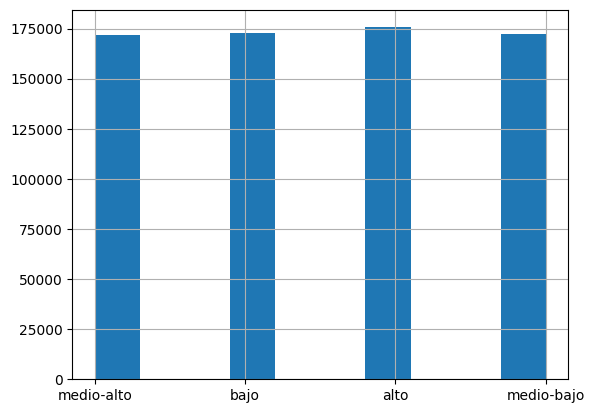

In [73]:
# Muestra un histograma de la columna RENDIMIENTO_GLOBAL
train.RENDIMIENTO_GLOBAL.hist()

## Convertir la columna objetivo (predicción) en valores discretos


In [74]:
# Mapea los valores de la columna objetivo RENDIMIENTO_GLOBAL a números discretos
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
train[y_col] = train[y_col].replace(rmap)
train.head()

C:\Users\jjcor\AppData\Local\Temp\ipykernel_19516\2924929317.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[y_col] = train[y_col].replace(rmap)


,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,F_TIENECOMPUTADOR,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,Si,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,Si,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,False,False


# Analisis

In [75]:
# Cuenta el número de columnas por tipo de dato
train.dtypes.value_counts()

bool       50
float64    10
object      5
int64       2
Name: count, dtype: int64

# Preprocesamientos



*   Normalización.
$$z=\frac{X-max(x)}{min(x)}$$
*   Estandarización.

$$z=\frac{X-media(x)}{devestad(x)}$$



In [76]:
# Ejemplo de cálculo numérico (no relacionado con el DataFrame)
(5-3)/1

2.0

# Selección de caracteristicas



*   Selección Basada en la varianza


```
from sklearn.feature_selection import VarianceThreshold

# Eliminar características con varianza menor a un umbral
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)
```



*   Selección Basada en la Correlacion


```
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = np.corrcoef(X.T)

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True)
plt.show()

```

* Selección Basada en la importacia del modelo
  * Arboles de Decisión


  ```
  from sklearn.ensemble import RandomForestClassifier

  # Entrenar el modelo de Random Forest
  model = RandomForestClassifier()
  model.fit(X_train, y_train)

  # Extraer la importancia de cada característica
  importances = model.feature_importances_

  # Visualizar las características más importantes
  feature_names = df.columns
  sorted_indices = np.argsort(importances)[::-1]
  plt.bar(range(X.shape[1]), importances[sorted_indices])
  plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
  plt.show()
  ```


  * Random Forest
  * Gradient Boosting
  * XGBoost


```
from xgboost import XGBClassifier
from xgboost import plot_importance

# Entrenar el modelo XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Mostrar la importancia de las características
plot_importance(xgb)
plt.show()
```



* RFE(Metodos recursivos de eliminación)


```
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Crear un modelo base
model = LogisticRegression()

# Inicializar RFE con el modelo
selector = RFE(estimator=model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

# Obtener las características seleccionadas
X_selected = selector.transform(X_train)

```

* Y faltan...






In [77]:
# Muestra las primeras filas del DataFrame
train.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,F_TIENECOMPUTADOR,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,Si,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,Si,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,False,False


In [78]:
# Reemplaza valores booleanos (False, True) y sus representaciones en texto por 0 y 1
train.replace(["False", "Fals", "F"], 0, inplace=True)
train.replace(["True"], 1, inplace=True)

train.replace([False], 0, inplace=True)
train.replace([True], 1, inplace=True)

C:\Users\jjcor\AppData\Local\Temp\ipykernel_19516\1986106013.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.replace([True], 1, inplace=True)


In [79]:
# Muestra las primeras filas del DataFrame actualizado
train.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,F_TIENECOMPUTADOR,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,Si,...,0,0,0,0,0,0,0,0,0,0
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,Si,...,0,0,0,0,0,0,0,0,0,0
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,0,0,0,0,0,0,0,0,0,0
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,Si,...,0,0,0,0,1,0,0,0,0,0
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,Si,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# Cuenta los valores faltantes (NaN) por columna en el DataFrame actualizado
train.isna().sum()

ID                             0
E_VALORMATRICULAUNIVERSIDAD    0
E_HORASSEMANATRABAJA           0
F_ESTRATOVIVIENDA              0
F_TIENEINTERNET                0
                              ..
DEP_SAN_ANDRES                 0
DEP_SUCRE                      0
DEP_TOLIMA                     0
DEP_VALLE                      0
DEP_VAUPES                     0
Length: 67, dtype: int64

In [81]:
# Cuenta el número de columnas por tipo de dato en el DataFrame actualizado
train.dtypes.value_counts()

int64      52
float64    10
object      5
Name: count, dtype: int64

In [82]:
# Guarda el DataFrame procesado en un archivo CSV
train.to_csv('train_preprocesamiento3.csv', index=False)